In [16]:
# %pip install numpy scikit-learn matplotlib keras tensorflow

In [17]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Input

## Dataset
Gerar o conjunto de dados make circles

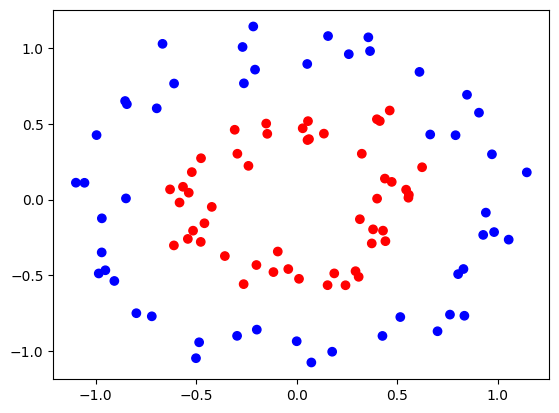

In [18]:
X, Y = datasets.make_circles(100, noise=0.1, factor=0.5)

color = ['blue' if k == 0 else 'red' for k in Y]
plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('circulos.svg')

## Função de ativação
Essas funções servem para que a rede consiga aprender relações não lineares.

Sem elas, a rede seria apenas uma combinação linear de entradas (como uma regressão linear), incapaz de resolver problemas como o dataset dos círculos.

A sigmoid é comum em camadas de saída binárias, e a tanh é usada em camadas escondidas porque é simétrica em torno de zero (facilita o aprendizado).

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

## Rede Manual

Rede manual com 4 neurõnios escondidos

In [20]:
def run_neural_net(x, w0, b0, b1, w1):
    # camada escondida com 4 neurônios (tanh)
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    # camada de saída (sigmoide)
    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    return 1 if y1 > 0.5 else 0


In [21]:
def neural_net(x, d, w0, b0, b1, w1):
    # forward
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    e = y1 - d
    L = 1/2 * (e ** 2)

    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    # derivadas
    grad_y1 = e
    grad_v1 = grad_y1 * y1 * (1 - y1)

    grad_w1 = grad_v1 * y0
    grad_b1 = grad_v1

    grad_y0 = grad_v1 * w1
    grad_v0 = grad_y0 * (1 - np.tanh(v0) ** 2)  # derivada tanh

    grad_w0 = np.outer(grad_v0, x)
    grad_b0 = grad_v0

    return grad_w0, grad_b0, grad_w1, grad_b1, L

Código principal

In [ ]:
def main():
    # inicialização aleatória
    np.random.seed(42)
    w0 = np.random.rand(4, 2)  # 4 neurônios escondidos
    w1 = np.random.rand(4)     # pesos da camada de saída
    b0 = np.random.rand(4)     # bias da camada escondida
    b1 = np.random.rand(1)     # bias da saída

    # taxa de aprendizado
    taxa = 0.05

    # acurácia antes do treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print(acc, "acurácia antes do treinamento")

    # treinamento (gradiente descendente)
    for i in range(5000):
        loss = 0
        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X[k], Y[k], w0, b0, b1, w1)
            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(i, loss)

    # acurácia após o treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print('acc após treinamento:', acc)

    # Versão Keras
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=taxa)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, Y, epochs=200, verbose=False, batch_size=5)

    acc = model.evaluate(X, Y)
    print("Acurácia final (Keras):", acc)


main()

63 acurácia antes do treinamento
0 [14.72242375]
1000 [0.38926217]
2000 [0.22279658]
3000 [0.1548494]
4000 [0.11814957]
acc após treinamento: 100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0091 
Acurácia final (Keras): [0.007889721542596817, 1.0]
